### 경희대학교 산업경영공학과 김태호(2015100915)

# 백종원의 더본코리아 브랜드별 소비자 인식 조사

* 더본코리아의 국내런칭 브랜드들의 인식을 '네이버 공개 API'를 사용하여 네이버 블로그를 기준으로 조사해본다.
* 인터넷에 있는 비정형데이터를 받아와 형태소분석을 통해 주요 keywords를 wordcloud형태로 시각화 해본다.

### 기본개념설명

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
import urllib.request
import urllib.parse
import time
import re #정규식
import urllib.request
import urllib.parse
import os
import sys

In [ ]:
# 네이버 검색 API예제는 블로그를 비롯 전문자료까지 호출방법이 동일하므로 blog검색만 대표로 예제를 올렸습니다.
# 네이버 검색 Open API 예제 - 블로그 검색
client_id = "***************" #승인받은 id입력
client_secret = "***********" #승인받은 secret number입력
encText = urllib.parse.quote("홍콩반점0410") #홍콩반점0410을 검색
url = "https://openapi.naver.com/v1/search/blog?query=" + encText + "&display=100"# json 결과, disply키워드를 통해 100개 검색
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)
HK_0410 = response_body.decode('utf-8')

```
{
"lastBuildDate": "Mon, 25 Feb 2019 11:20:47 +0900",
"total": 21282,
"start": 1,
"display": 100,
"items": [
{
"title": "1월 일상블로그. (+ <b>홍콩반점0410</b> &amp; 디저트39 &amp; 노오븐 고구마빵)",
"link": "http://blog.naver.com/parkmiso03?Redirect=Log&amp;logNo=221469121130",
"description": "새해를 맞이하여 <b>홍콩반점0410</b> 를 갔습니다! 평소에 지나가면서 어찌나 신메뉴 고추짬뽕이 맛있어보이던지. 고추짬뽕 쟁반짬뽕 찹쌀탕수육 쟁반짬뽕은 짬뽕맛은 1도 안나고 1도 안맵고 짜장맛이 납니다. 뭐, 맛은... ",
"bloggername": "미소짓는 손짓",
"bloggerlink": "http://blog.naver.com/parkmiso03",
"postdate": "20190218"

}................
```

* 미리 네이버 api를 사용할 수 있도록 신청하여 받은 id와 secret_num을 입력하여 '홍콩반점0410'이 포함된 블로그 내용을 가져온다.

In [ ]:
content = ""
st_num = 0
en_num = 0
tmp = HK_0410
while True:
    tmp = tmp[en_num+st_num+16:]
    st_num = tmp.find('"description": ')
    if st_num == -1:
        break
    en_num = tmp[st_num+16:].find('"')
    cont_tmp = tmp[st_num+16:en_num+st_num+16]
    content += cont_tmp
content

```
"새해를 맞이하여 <b>홍콩반점0410</b> 를 갔습니다! 평소에 지나가면서 어찌나 신메뉴 고추짬뽕이 맛있어보이던지. 고추짬뽕 쟁반짬뽕 찹쌀탕수육 쟁반짬뽕은 짬뽕맛은 1도 안나고 1도 안맵고 짜장맛이 납니다. 뭐, 맛은... <b>홍콩반점 0410</b>, 새마을식당, 본가 등 백종원님의 더본 코리아 프렌차이즈들이 여럿 들어와있었어요. 특히 홍콩반점은 다녀간 분들의 평이 너무 좋아서, 첫끼를 여기서 먹고자 오픈까지의 기나긴 시간도 꾹 참고... ㅎㅎㅎㅎ 매콤한 짬뽕에 청양고추를 더해 속이 확 풀어지는 맛을 원하신다면 홍콩반점의 고추짬뽕 추천합니다. 한남동 중식 <b>홍콩반점 0410</b> 서울특별시 용산구 한남대로 21길 20지하1층 02 796 -0410 주차없음. (근처... 짬뽕이 먹고싶다는 애쁨이와 산본맛집 <b>홍콩반점0410</b>으로 고고! 애쁨이를 가졌을때 입덧중에 유일하게... 산본맛집 <b>홍콩반점0410</b>의 영업시간은 오전 11시부터 오후 11시 20분까지이며 오후 3시 30분 부터 4시... 역시 군만두에는 단무지죠!! 이 날 제대로 &quot;홍콩반점&quot;에서 제대로 해장하고 갔어요~ 식당정보 백종원의 <b>홍콩반점0410</b>.........."
```

* naver api를 통해 받은 내용 중 필요한 본문내용이 담긴 'description'부분을 따로 뽑아서 string형식으로 content에 내용을 합친다.

In [4]:
import nltk
from konlpy.tag import Twitter; t = Twitter()

C:\Users\study\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [ ]:
tokens_ko = t.morphs(content)
tokens_ko

```
['새해',
 '를',
 '맞이',
 .
 .
 .
 .
 '지나가면서']
```

* content의 내용을 형태소를 단위로 나눈다.

In [ ]:
ko = nltk.Text(tokens_ko, name='홍콩반점0410')
ko.vocab().most_common(100)

```
[('b', 264),
 ('>', 241),
 ('홍콩', 211),
 ('반점', 203),
 ('0410', 155),
 .
 .
 .
 .
 ('..', 7),
 ('먹을', 7)]
 ```

* 어떤 형태소가 얼마만큼 쓰였는지 확인하고 삭제해야할 형태소들을 찾아내어 stop_words에 넣는다.

In [ ]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도','0410', '!', ':','b','>','</','<',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들', '-',"ㅋㅋ","해","에게","부터","길","서",'~~'
                      ';','들','데','..','의','때','겠','고','게','네요','한','일','할','에서','#<','>...',
                      '&','?','하는','quot','주','려고','인데','거','좀','는데','~','ㅎㅎ','-',')','(','에서','#','점','보니','가는','적',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려','속눈썹','바로', '까지', '이라','본',
                      '지','있','못','후','중','/','6','과','어떤','기본','!!','홍콩','반점','영업','번','인','날','그','님','안','군',
                      ';','곳','라고','중요한','합',"'",'....','+','네','죠','싶어서','있어서','만','입니다','하고','오늘','층','와']

tokens_ko = [each_word for each_word in tokens_ko 
                                                         if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='홍콩반점0410')
ko.vocab().most_common(50)

```
[('짬뽕', 56),
 ('탕수육', 30),
 ('맛집', 27),
 ('짜장면', 25),
 ('백종원', 24),
 .
 .
 .
 ('지하', 5),
 ('주차', 5),
 ('11시', 5)]
 ```

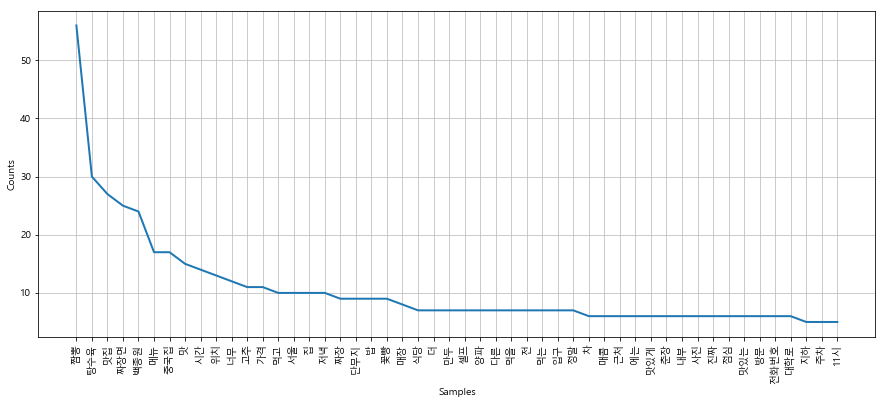

In [8]:
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

* 불필요한 형태소를 제거하고 제일 많이 나온 순서대로 상위 50개를 그래프로 보기 쉽게 나타낸다.

In [9]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

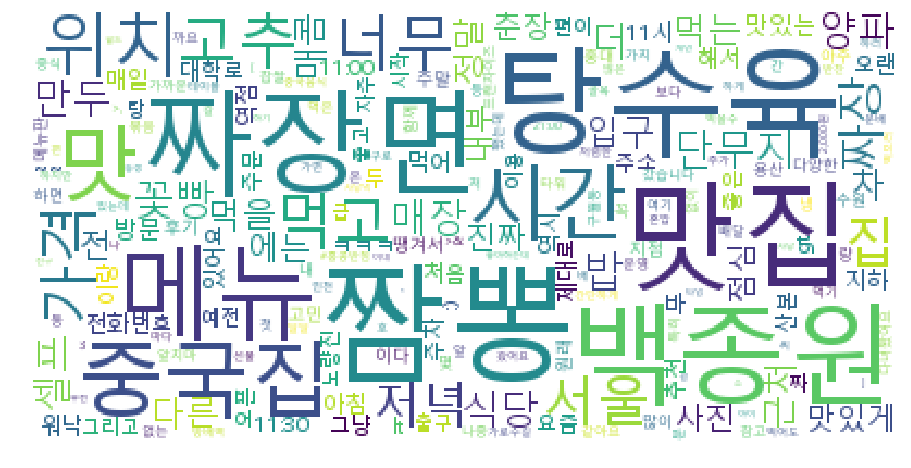

In [10]:
data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

* wordclod 형태로 알아보기 쉽게 나타낼 수 있다.

### 브랜드별 인식 분석

In [11]:
THEBORN = ["백종원의 원조쌈밥집","한신포차","새마을식당","백종원본가","빽다방","홍콩반점0410","미정국수0410","백스비어","역전우동0410","돌배기집","백철판0410"]

* 더본코리아의 런칭브랜드 11개를 THEBORN에 넣어 사용하기 편하게 한다

In [ ]:
THEBORN_CON = []
for theborn in THEBORN:
    client_id = "***************" #승인받은 id입력
    client_secret = "***********" #승인받은 secret number입력
    encText = urllib.parse.quote(theborn)
    url = "https://openapi.naver.com/v1/search/blog?query=" + encText + "&display=100"# json 결과
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
    else:
        print("Error Code:" + rescode)
    tb = response_body.decode('utf-8')
    content = ""
    st_num = 0
    en_num = 0
    tmp = tb
    while True:
        tmp = tmp[en_num+st_num+16:]
        st_num = tmp.find('"description": ')
        if st_num == -1:
            break
        en_num = tmp[st_num+16:].find('"')
        cont_tmp = tmp[st_num+16:en_num+st_num+16]
        content += cont_tmp
    THEBORN_CON.append(content)
THEBORN_CON

In [13]:
len(THEBORN_CON) == len(THEBORN)

True

* naver api를 사용하여 브랜드별로 블로그 내용을 받아온다.
* THEBORN_CON 과 THEBORN의 길이가 같으므로 오류없이 잘 가져왔다는 것을 알 수 있다.

In [14]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도','0410', '!', ':','b','>','</','<','!!!','4','분','▲',
                '안녕하세요','된','좋','1','는','로','으로','2','것','은','다',',','니다','대','들', '-',"ㅋㅋ","해","에게","부터","서",
                ';','들','데','..','의','때','겠','고','게','네요','한','일','할','에서','#<','>...','ㅗ','그리고','국수','미정','비어',
                '식당','새마을','인분','후기','CU','편의점','라','같아요','두','이다','급','>!','아','쪽','이라고','백','ㅋ','데이',
                '본가','gt','ㅎ','lt',';&','.....','에도','씨','기','에요','명','빽','다방','비','위해','앗','메리','카노','amp',
                '&','?','하는','quot','주','려고','인데','거','좀','는데','~','ㅎㅎ','-',')','(','에서','#','점','보니','가는','적',
                '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려','속눈썹','바로', '까지', '이라','본','수집',"길",
                '지','있','못','후','중','/','6','과','어떤','기본','!!','홍콩','반점','영업','번','인','날','그','님','안','군','>.',
                '집','조','원','원조','쌈밥','^^','저희','건물','나','대표','저','푸','여기','ㅋㅋㅋ','3','합니다','><','코리아','~~',
                '한신포차','한신','그래서','오','이랑','에는','메뉴인','ㅋㅋㅋㅋㅋ','근데','하면','랑','진','내','정도','해서','~~','s',
                '비어','스',"'s",'>(','역전','별','역점',"'<",'동','배기','돌','포스팅','웰시','바','히','철판','엔','이에요','번가',
                ';','곳','라고','중요한','합',"'",'....','+','네','죠','싶어서','있어서','만','입니다','하고','오늘','층','와']


* 수작업으로 필요없는 형태소들을 제거한다.

#### 백종원의 원조쌈밥집

백종원의 원조쌈밥집의 주요 키워드


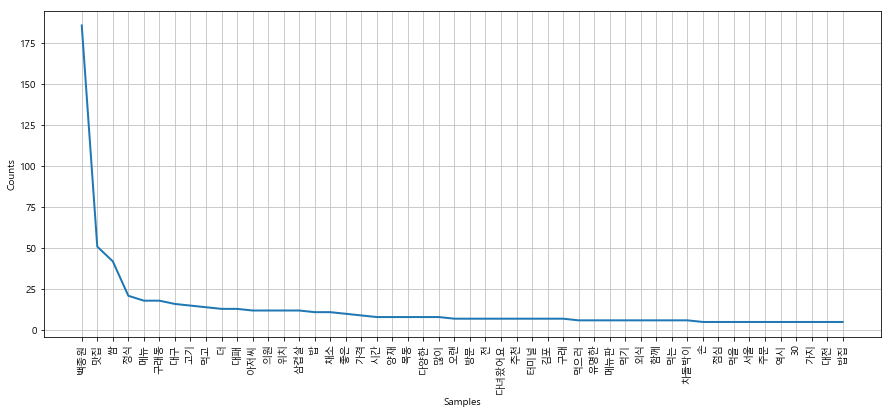

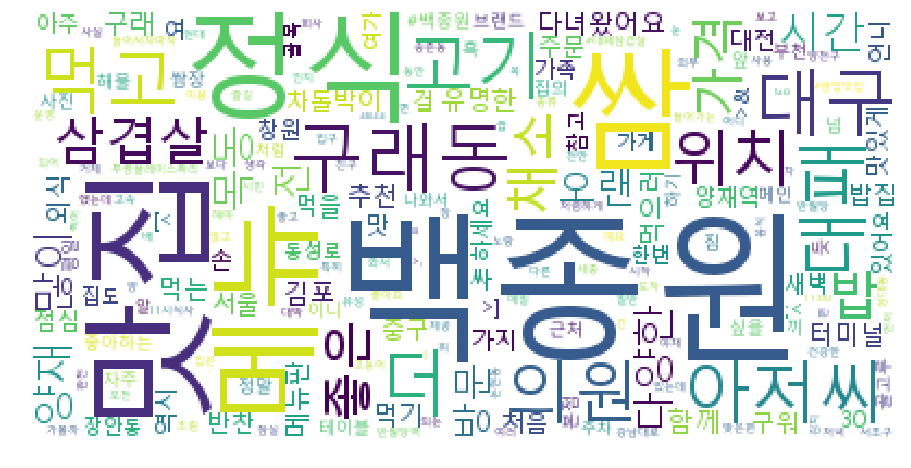

In [15]:
n=0
tokens_ko = t.morphs(THEBORN_CON[n])
tokens_ko = [each_word for each_word in tokens_ko 
                                                     if each_word not in stop_words]
THEBORN[n] = nltk.Text(tokens_ko, name=THEBORN[n])
THEBORN[n].vocab().most_common(50)
print(str(THEBORN[n]).lstrip('<Text: ').rstrip('>')+'의 주요 키워드')
plt.figure(figsize=(15,6))
THEBORN[n].plot(50) 
data = THEBORN[n].vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

* 더 본 코리아의 대표인 백종원에 관한 이미지가 강하다. 아무래도 다른 브랜드에 비해 많이 알려진 브랜드는 아니기 때문에 백종원의 음식에 대한 이미지들이 이 브랜드에 큰 영향을 줄 것이다.


* 메뉴로는 쌈, 정식, 고기, 대패 삼겹살, 30가지 채소, 차돌박이라는 키워드가 많이 보인것으로 보아 이런 메뉴들이 인기가 있다는 것을 알 수 있다.


* 아저씨, 의원이라는 키워드를 보아 주 고객들의 연령대는 높은 것으로 보인다.


* 위치, 먹으러, 메뉴판, 외식, 다녀왔어요 라는 키워드가 많은 것으로 보아 주로 손님들이 배달보다는 식당에 가서 먹는것을 선호 한다는 경향을 알 수 있다.


* 마지막으로 더, 좋은, 많이, 다양한, 맛 이라는 메뉴에 대한 키워드들도 눈에 띄었다.

#### 한신포차

한신포차의 주요 키워드


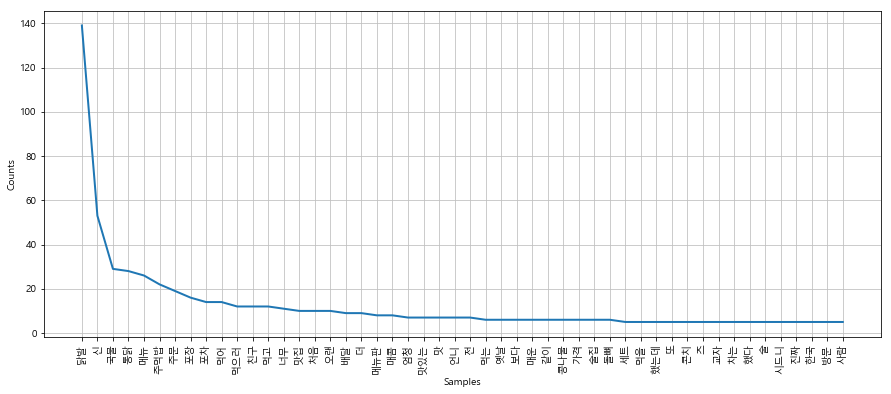

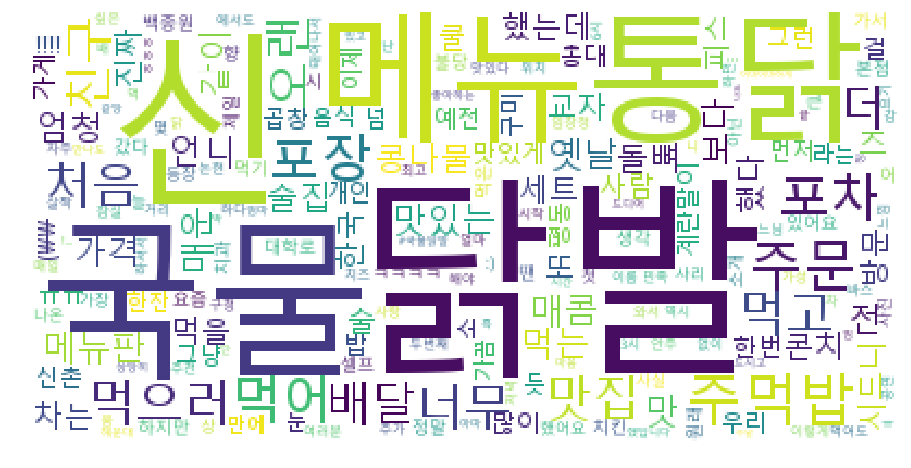

In [16]:
n=1
tokens_ko = t.morphs(THEBORN_CON[n])
tokens_ko = [each_word for each_word in tokens_ko 
                                                     if each_word not in stop_words]
THEBORN[n] = nltk.Text(tokens_ko, name=THEBORN[n])
THEBORN[n].vocab().most_common(50)
print(str(THEBORN[n]).lstrip('<Text: ').rstrip('>')+'의 주요 키워드')
plt.figure(figsize=(15,6))
THEBORN[n].plot(50) 
data = THEBORN[n].vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

* 국물 닭발이 유명한 브랜드답게 닭발이라는 키워드가 압도적으로 많았다. 그외에도 통닭, 오돌뼈, 콘치즈교자와 같은 메뉴들에 대한 언급이 많았고, '신' 이라는 키워드는 신메뉴를 의미하는 것으로 추측할 수 있는 것으로 보아 신메뉴 출시가 이 브랜드에 매출에 큰 영향을 끼칠 수 있다는 것을 알 수 있다.


* 먹으러,방문 이라는 키워드도 많지만 다른 브랜드에 비해 '배달', '포장'이라는 키워드 들이 유난히 눈에 띄는 것으로 보아 배달과 포장을 원하는 손님들이 많다는 것을 알 수 있다.


* 친구, 언니, 술집 이라는 키워드를 보아 주로 친구들끼리 술을 마시러 오는 가벼운 분위기의 이미지가 강하고 여자손님들도 많다는 것을 알 수 있다.


* 메뉴에 대한 추가적인 키워드로는 매콤, 맛있는, 매운이라는 키워드가 있는 것으로 보아 매운 메뉴들이 주로 인기를 끌고 있다고 생각할 수 있다.

#### 새마을식당

새마을식당의 주요 키워드


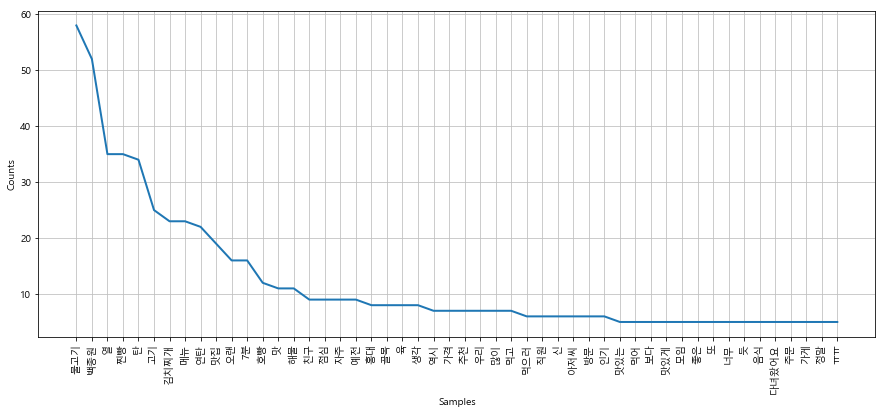

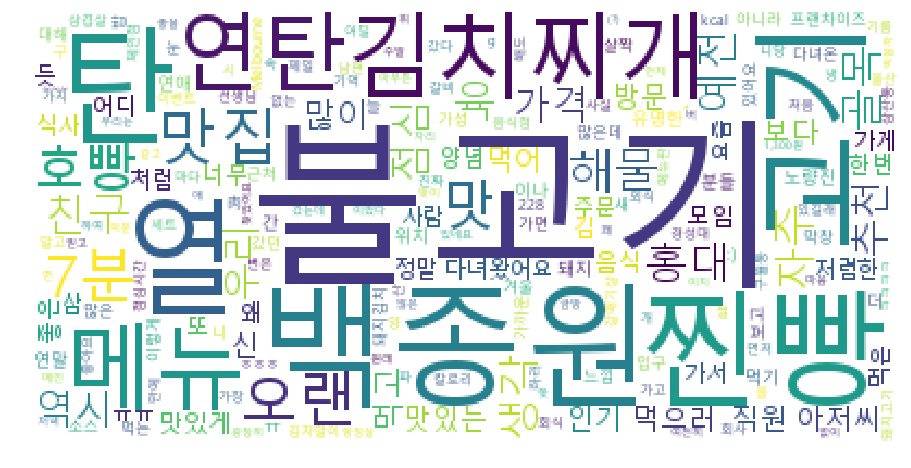

In [17]:
n=2
tokens_ko = t.morphs(THEBORN_CON[n])
tokens_ko = [each_word for each_word in tokens_ko 
                                                     if each_word not in stop_words]
THEBORN[n] = nltk.Text(tokens_ko, name=THEBORN[n])
THEBORN[n].vocab().most_common(50)
print(str(THEBORN[n]).lstrip('<Text: ').rstrip('>')+'의 주요 키워드')
plt.figure(figsize=(15,6))
THEBORN[n].plot(50) 
data = THEBORN[n].vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

* 더 본 코리아의 대표인 백종원에 관한 이미지가 강하다. 백종원의  대표적인 브랜드중 하나이기 때문에 백종원의 음식에 대한 이미지들이 이 브랜드에 큰 영향을 줄 것이다.


* 메뉴로는 연탄 불고기, 7분돼지김치찌개 라는 키워드가 많이 보인것으로 보아 이 두가지 메뉴가 이 브랜드의 대표메뉴로 자리 잡았다고 볼 수 있다.( 찐빵, 호빵이라는 키워드는 최근에 출시된 새마을식당찐빵을 의미하기 때문에 신경쓸 필요가 없다.)


* 점심, 모임, 친구라는 키워드를 보아 점심에 이용하는 고객들이 많고, 친구와 식사를 하거나 모임을 하는 장소로 많이 쓰인다는 것을 알 수 있다.


* 방문, 먹으러, 다녀왔어요 라는 키워드가 많은 것으로 보아 주로 손님들이 배달보다는 식당에 가서 먹는것을 선호 한다는 경향을 알 수 있다.


* 마지막으로 가격, 많이, 맛있게, 맛 이라는 메뉴에 대한 키워드들도 눈에 띄었다.

#### 백종원본가

백종원본가의 주요 키워드


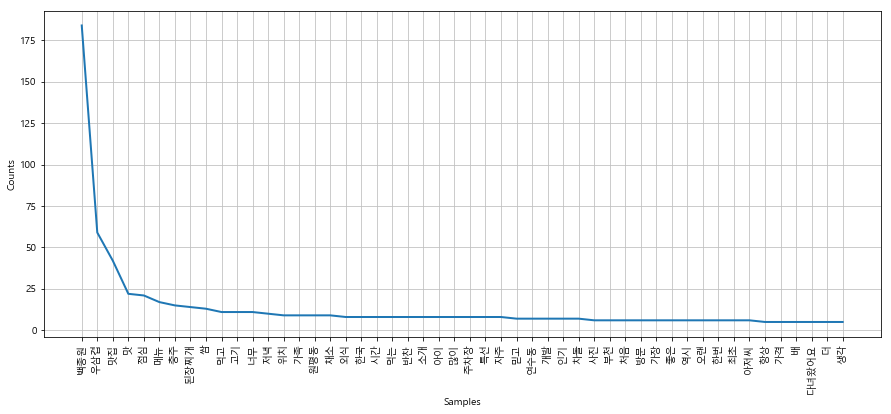

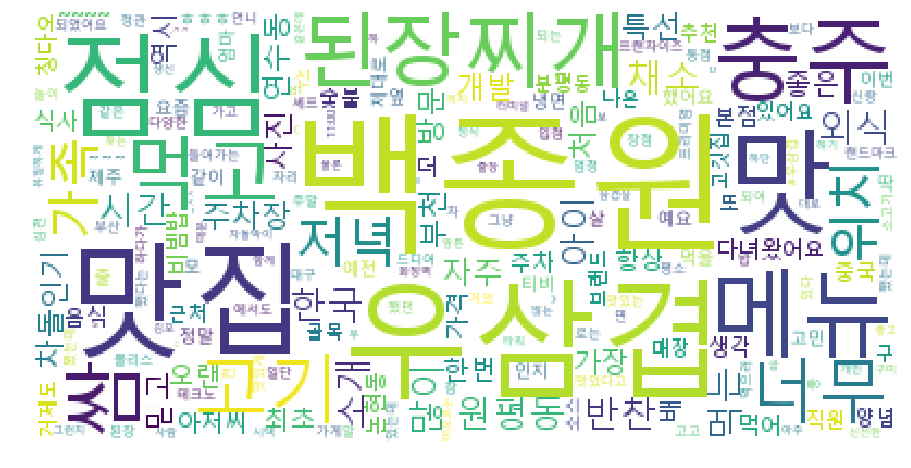

In [18]:
n=3
tokens_ko = t.morphs(THEBORN_CON[n])
tokens_ko = [each_word for each_word in tokens_ko 
                                                     if each_word not in stop_words]
THEBORN[n] = nltk.Text(tokens_ko, name=THEBORN[n])
THEBORN[n].vocab().most_common(50)
print(str(THEBORN[n]).lstrip('<Text: ').rstrip('>')+'의 주요 키워드')
plt.figure(figsize=(15,6))
THEBORN[n].plot(50) 
data = THEBORN[n].vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

* 더 본 코리아의 대표인 백종원에 관한 이미지가 강하다. 백종원의  대표적인 브랜드중 하나이기 때문에 백종원의 음식에 대한 이미지들이 이 브랜드에 큰 영향을 줄 것이다.


* 메뉴로는 우삼겹, 된장찌개, 고기, 채소, 특선, 반찬 이라는 키워드가 많이 보인것으로 보아 우삼겹에 대한 인식이 강하다는 것을 알 수 있다.


* 아이, 가족, 외식 이라는 키워드를 보아 주로 가족단위의 손님이 많다는 것을 알  수 있다.


* 주차장이라는 키워드가 많은 것으로 보아 주로 차로 오는 손님들이 많다는 것을 알 수 있어 주차장에 신경을 쓸 필요가 있을 것이다.


* 마지막으로 믿고, 역시, 좋은 이라는 키워드가 많을 것으로 보아 브랜드의 신뢰도가 아주 높다는 것을 알 수 있다.

#### 빽다방

빽다방의 주요 키워드


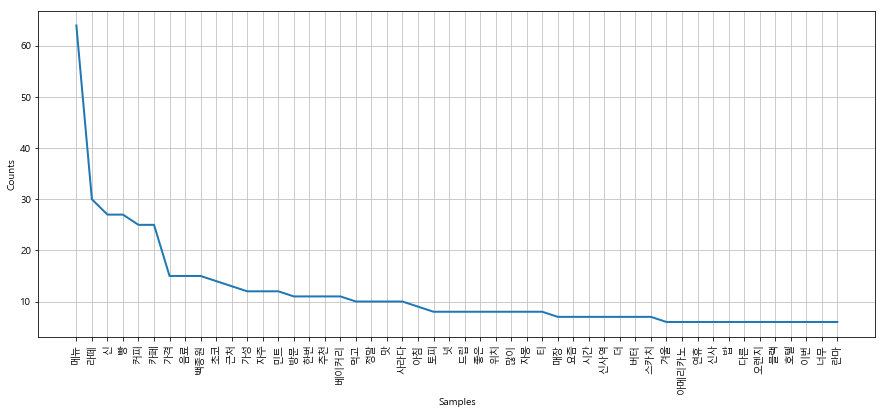

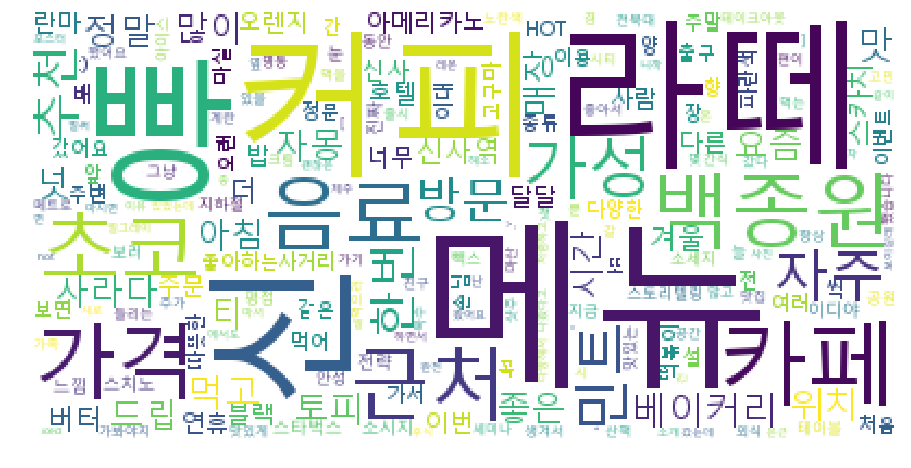

In [19]:
n=4
tokens_ko = t.morphs(THEBORN_CON[n])
tokens_ko = [each_word for each_word in tokens_ko 
                                                     if each_word not in stop_words]
THEBORN[n] = nltk.Text(tokens_ko, name=THEBORN[n])
THEBORN[n].vocab().most_common(50)
print(str(THEBORN[n]).lstrip('<Text: ').rstrip('>')+'의 주요 키워드')
plt.figure(figsize=(15,6))
THEBORN[n].plot(50) 
data = THEBORN[n].vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

* 베이커리, 신사역과 같은 키워드들은 최근 신사역에 새로 생긴 베이커리와 함께 운영하는 백다방을 의미하는데 이러한 눈에 띄는 변화들이 브랜드 전체에 큰 영향을 끼쳤다는 것을 알 수 있다.


* 메뉴로는 라떼, 토피넛, 민트초코, 커피, 사라다빵, 자몽티, 아메리카노 라는 키워드가 많이 보였고, 가성비라는 키워드를 보아 가성비에 대한 이미지가 좋다는 것을 알 수 있다. 또한 위에서 말 했듯이 '신'이라는 키워드가 많이 있는 것으로 보아 신메뉴출시가 이 브랜드의 매출에 큰 영향을 끼칠 것이다.


* 근처 라는 키워드를 보아 굳이 찾아가기 보다는 근처에 있을때 가는 소비패턴을 보여주고, 아침이라는 키워드 또한 다른 브랜드에서는 찾아보기 힘든 것이기에 눈에 띄었다.

#### 홍콩반점0410

홍콩반점0410의 주요 키워드


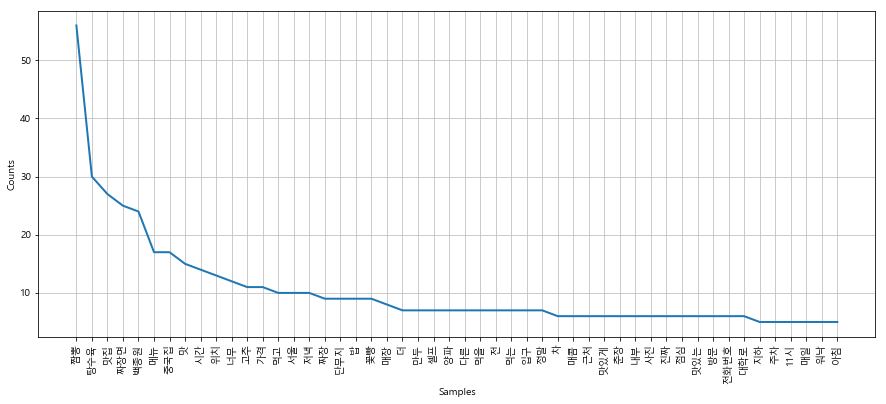

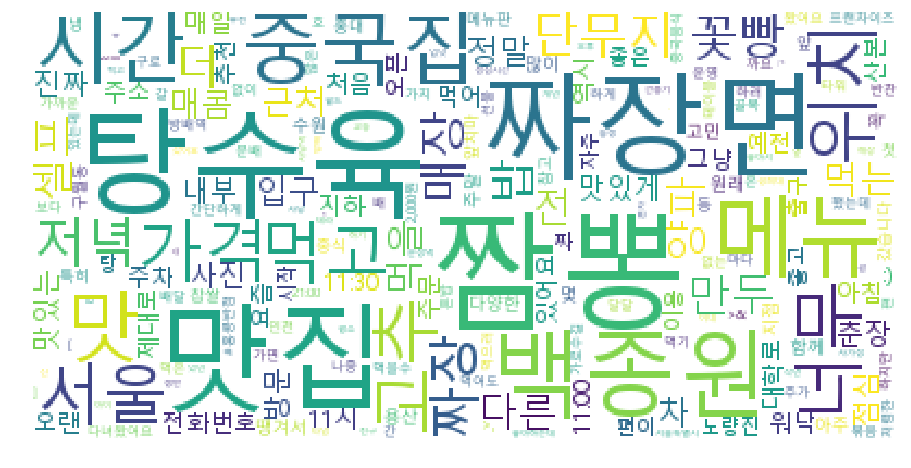

In [20]:
n=5
tokens_ko = t.morphs(THEBORN_CON[n])
tokens_ko = [each_word for each_word in tokens_ko 
                                                     if each_word not in stop_words]
THEBORN[n] = nltk.Text(tokens_ko, name=THEBORN[n])
THEBORN[n].vocab().most_common(50)
print(str(THEBORN[n]).lstrip('<Text: ').rstrip('>')+'의 주요 키워드')
plt.figure(figsize=(15,6))
THEBORN[n].plot(50) 
data = THEBORN[n].vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

* 중국집이라는 이미지가 강하고 매콤한 맛이 인기를 끄는것 같다. 가격이라는 키워드가 많은 것으로 보아 가격이 큰 영향을 끼치는 요소임을 알 수 있다.


* 메뉴로는 짬뽕과 탕수육에 대한 관심이 압도적이고, 상대적으로 짜장면에 대한 관심이 낮은 것으로 알 수 있다. 그 외에도 꽃빵, 만두, 단무지가 인기가 있었다.


* 저녁이라는 키워드가 점심보다 많은 것으로 보아 주로 저녁시간에 이용이 많다고 유추 할 수 있다.

#### 미정국수0410

미정국수0410의 주요 키워드


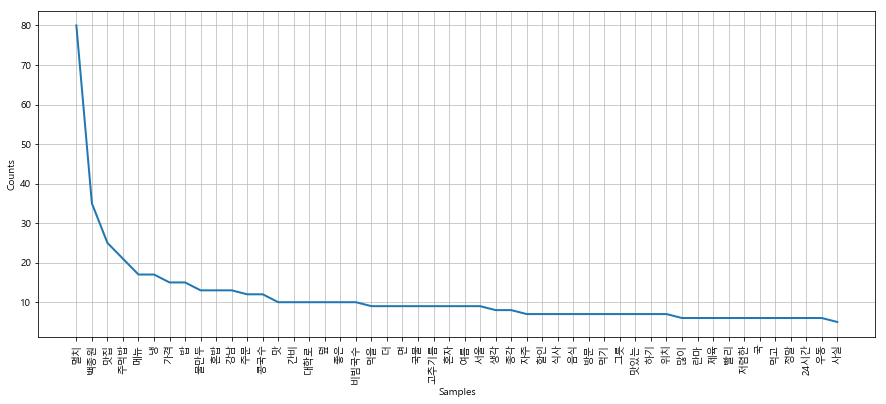

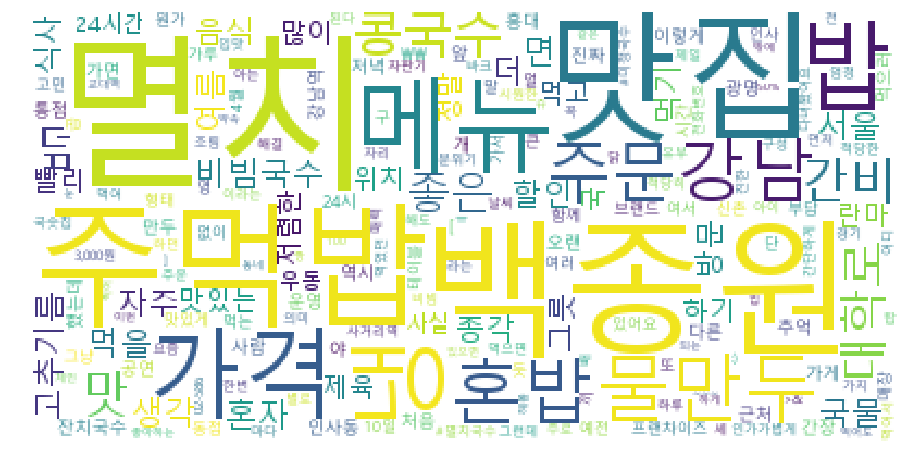

In [21]:
n=6
tokens_ko = t.morphs(THEBORN_CON[n])
tokens_ko = [each_word for each_word in tokens_ko 
                                                     if each_word not in stop_words]
THEBORN[n] = nltk.Text(tokens_ko, name=THEBORN[n])
THEBORN[n].vocab().most_common(50)
print(str(THEBORN[n]).lstrip('<Text: ').rstrip('>')+'의 주요 키워드')
plt.figure(figsize=(15,6))
THEBORN[n].plot(50) 
data = THEBORN[n].vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

* 메뉴중 멸치국수에 대한 관심이 압도적이고, 그 뒤로는 특정메뉴에 몰리기 보다는 주먹밥, 물만두, 콩국수, 명란마요덮밥, 간비국수, 비빔국수, 제육 등등 다른 브랜드에 비해 여러 메뉴에 골고루 관심이 있다는 것을 알 수 있다. 이러한 점이 장점일 수 도 있지만, 특색있는 대표메뉴가 부족하다는 단점이 될 수 도 있을 것이다.


* 다른 브랜드와 다르게 혼자, 혼밥이라는 키워드가 많은 것으로 보아 혼자 식사를 하는 고객들이 많은것을 알 수 있다.


* 저렴한, 빨리, 24시간 이라는 키워드를 보아 저렴한 가격과 빨리 끼니를 해결할 수 있는 점과 24시간이라는 점이 이 브랜드의 매력이라는 것을 알 수 있다.

#### 백스비어

백스비어의 주요 키워드


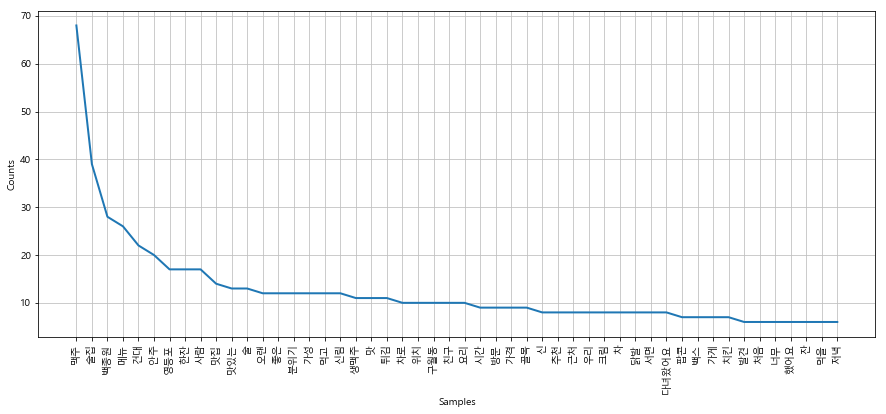

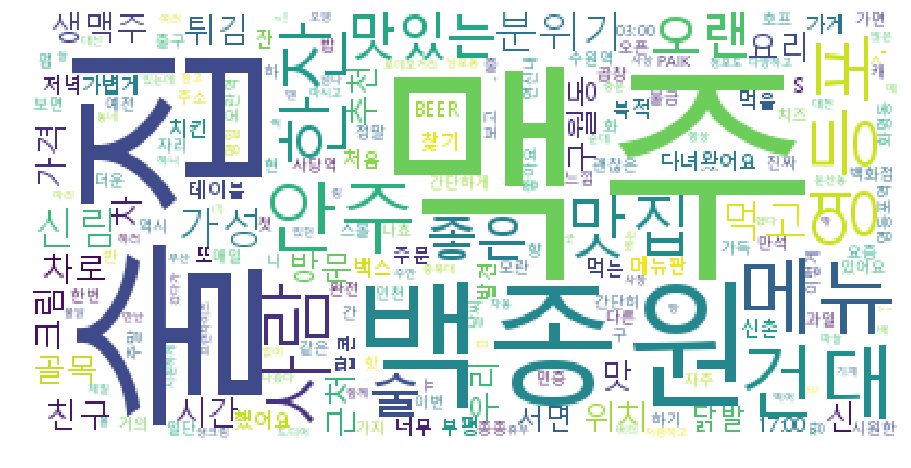

In [22]:
n=7
tokens_ko = t.morphs(THEBORN_CON[n])
tokens_ko = [each_word for each_word in tokens_ko 
                                                     if each_word not in stop_words]
THEBORN[n] = nltk.Text(tokens_ko, name=THEBORN[n])
THEBORN[n].vocab().most_common(50)
print(str(THEBORN[n]).lstrip('<Text: ').rstrip('>')+'의 주요 키워드')
plt.figure(figsize=(15,6))
THEBORN[n].plot(50) 
data = THEBORN[n].vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

* 맥주, 한잔, 술집이라는 키워드가 압도적으로 많은 것을 보아 맥주를 마시기 위한 목적으로 많이 찾는 다는 것을 알 수 있다.


* 가성비, 분위기, 맛이라는 키워드를 보아 좋은 분위기와 가성비, 맛있는 안주가 이 브랜드를 찾는 이유라는 것을 알 수 있다.


* 메뉴로는 크림생맥주, 닭발튀김, 팝콘, 치킨이 많이 나왔지만 다른 키워드에 비해 그리 많이 나오지 않은 것으로 보아 이 브랜드에 확실한 대표메뉴가 없다는 것을 알 수 있다. 

#### 역전우동0410

역전우동0410의 주요 키워드


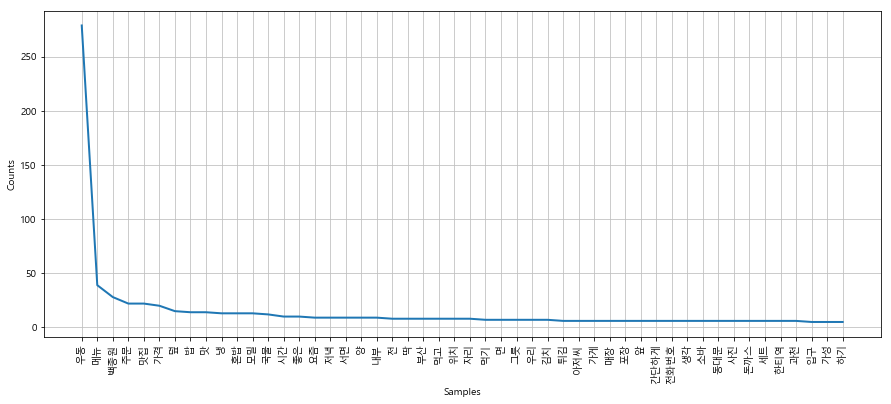

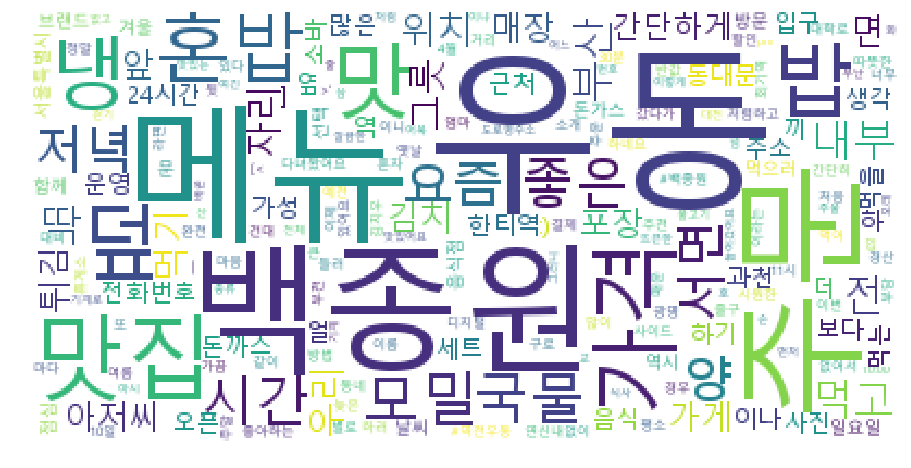

In [23]:
n=8
tokens_ko = t.morphs(THEBORN_CON[n])
tokens_ko = [each_word for each_word in tokens_ko 
                                                     if each_word not in stop_words]
THEBORN[n] = nltk.Text(tokens_ko, name=THEBORN[n])
THEBORN[n].vocab().most_common(50)
print(str(THEBORN[n]).lstrip('<Text: ').rstrip('>')+'의 주요 키워드')
plt.figure(figsize=(15,6))
THEBORN[n].plot(50) 
data = THEBORN[n].vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

* 키워드들의 내용과 경향이 미정국수0410과 매우 비슷하게 나왔다. 메뉴중 우동에 대한 관심이 압도적이고, 그 뒤로는 특정메뉴에 몰리기 보다는 다른 브랜드에 비해 여러 메뉴에 골고루 관심이 있다는 것을 알 수 있다. 이러한 점이 장점일 수 도 있지만, 특색있는 대표메뉴가 부족하다는 단점이 될 수 도 있을 것이다.


* 다른 브랜드와 다르게 혼밥이라는 키워드가 많은 것으로 보아 혼자 식사를 하는 고객들이 많은것을 알 수 있다.


* 양, 가격, 맛이라는 키워드 들이 많이 보이는 것을 알 수 있다.

#### 돌배기집

돌배기집의 주요 키워드


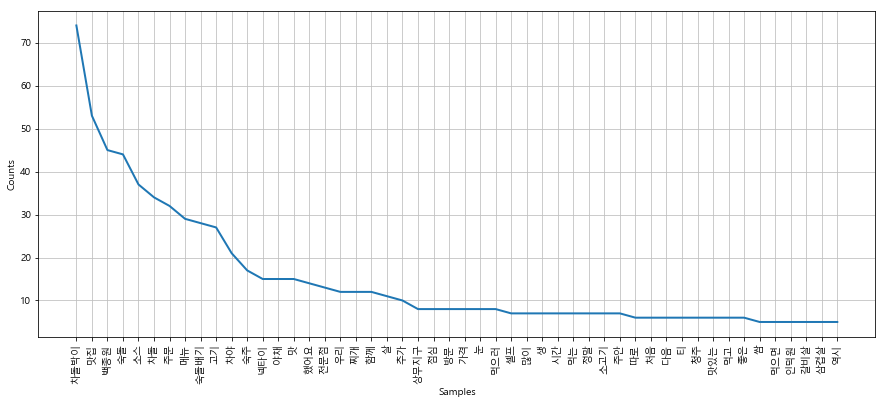

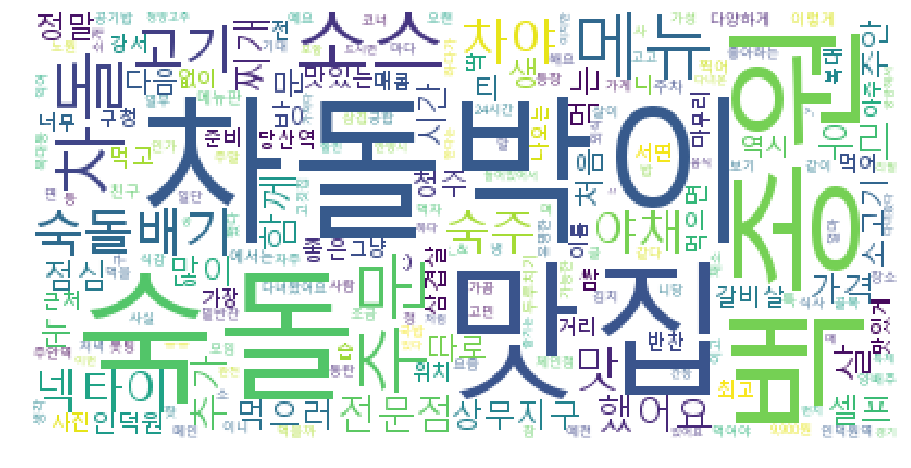

In [24]:
n=9
tokens_ko = t.morphs(THEBORN_CON[n])
tokens_ko = [each_word for each_word in tokens_ko 
                                                     if each_word not in stop_words]
THEBORN[n] = nltk.Text(tokens_ko, name=THEBORN[n])
THEBORN[n].vocab().most_common(50)
print(str(THEBORN[n]).lstrip('<Text: ').rstrip('>')+'의 주요 키워드')
plt.figure(figsize=(15,6))
THEBORN[n].plot(50) 
data = THEBORN[n].vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

* 차돌박이가 대표메뉴인 브랜드 답게 차돌박이에 대한 언급이 많았고, 숙돌배기와 넥타이살이라는 돌배기집에서만 먹을 수 있는 메뉴도 언급이 많이 되었다. 소스라는 키워드도 높은 것을 보아 소스에대한 관심도 매우 높다는 것을 알 수 있다.


* 전문점이라는 키워드를 보아 고객들로 부터 신뢰도가 높다는 것을 알 수 있다.

#### 백철판0410

백철판0410의 주요 키워드


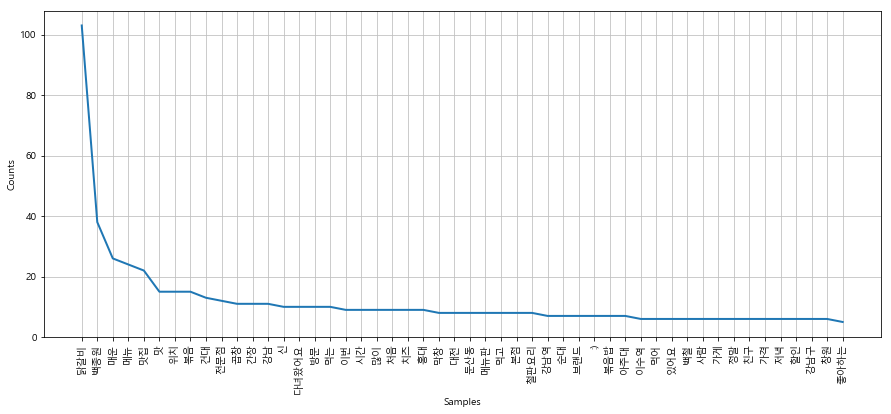

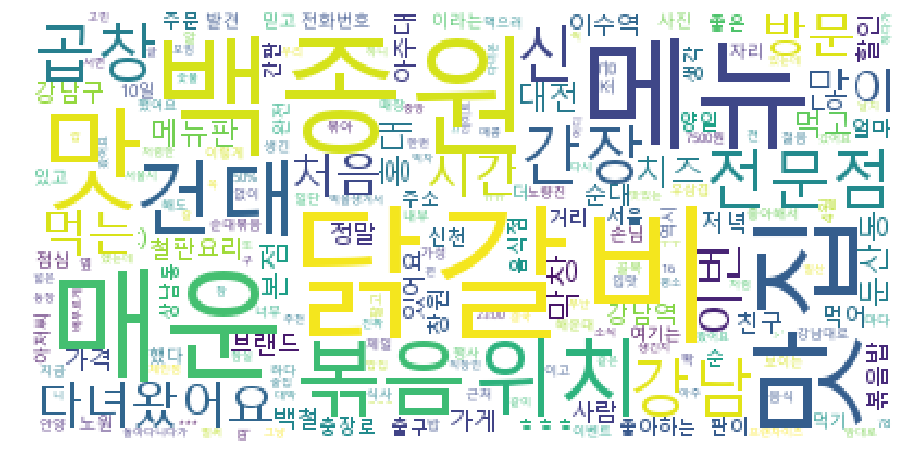

In [25]:
n=10
tokens_ko = t.morphs(THEBORN_CON[n])
tokens_ko = [each_word for each_word in tokens_ko 
                                                     if each_word not in stop_words]
THEBORN[n] = nltk.Text(tokens_ko, name=THEBORN[n])
THEBORN[n].vocab().most_common(50)
print(str(THEBORN[n]).lstrip('<Text: ').rstrip('>')+'의 주요 키워드')
plt.figure(figsize=(15,6))
THEBORN[n].plot(50) 
data = THEBORN[n].vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

* 대표메뉴인 닭갈비에 대한 관심도가 압도적으로 높았고, '매운'과 '치즈'라는 키워드가 많이 언급된 것으로 보아 '치즈 매운 닭갈비'가 인기 메뉴임을 알 수 있다. 또한 닭갈비에 비해 곱창, 막창, 순대에 대한 관심도는 적은 편으로 나왔다.


* 다른 브랜드에서는 자주 라는 키워드가 많이 보였는데, 백철판0410은 처음 이라는 키워드가 많이 보였다. 새로운 손님들의 유입이 높은 것은 긍정적이나 이들의 재방문율이 낮다고 유추 할 수 있다.